In [296]:
%matplotlib inline
from delay_char import DlyLineDlog
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
from collections import Counter

In [313]:
def data2df(lot_num, temp):
    dly = DlyLineDlog(os.path.join(".\\data\\Delay_line\\", lot_num, temp, "summary_" + temp + '.txt'), temp, lot_num)
    df_lst = dly.gen_df_lst()
    return pd.DataFrame(df_lst)



lotnum = "RC01927M"
temp = '25C'
df = data2df(lotnum, temp)
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))
lotnum = "RC01928M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

lotnum = "RC01929M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

df.columns = ['Lot', 'Temp', 'Dev#', 'VDD', 'Test', 'Data0', 'Data1']

In [327]:
def slice_unit(dev_num, lot_num, temp='all', data_frame=df):
    if isinstance(dev_num, list):
        for x in dev_num:
            if temp == 'all':
                data_frame = data_frame.drop(data_frame[(data_frame.Lot == lot_num) & (data_frame['Dev#'] == x)].index)
            else:
                data_frame = data_frame.drop(data_frame[(data_frame.Lot == lot_num) & (data_frame.Temp == temp) & \
                                                         (data_frame['Dev#'] == x)].index)
    else:
        if temp == 'all':
            data_frame = data_frame[(data_frame.Lot != lot_num) | (data_frame['Dev#'] != dev_num)]
        else:
            data_frame = data_frame[(data_frame.Lot != lot_num) | (data_frame.Temp != temp) | (data_frame['Dev#'] != dev_num)]
    return data_frame

In [328]:
df = slice_unit([20, 26], 'RC01928M', '25C')
df = slice_unit(21, 'RC01928M', '105C')
df = slice_unit(4, 'RC01927M', '25C')
df = slice_unit([20, 21, 25], 'RC01929M', '25C')
df = slice_unit([20, 21, 25], 'RC01929M', '105C')
df = slice_unit(9, 'RC01928M')

In [329]:
df[(df.Lot == 'RC01928M') & (df.Temp == '105C') & (df['Dev#'] == 21)]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1
20710,RC01928M,105C,21,3.7,Delay,1.9600,2000
20711,RC01928M,105C,21,3.6,Delay,1.9600,2000
20712,RC01928M,105C,21,3.5,Delay,1.9700,2000
20713,RC01928M,105C,21,3.4,Delay,1.9700,2000
20714,RC01928M,105C,21,3.3,Delay,1.9700,2000
20715,RC01928M,105C,21,3.2,Delay,1.9700,2000
20716,RC01928M,105C,21,3.1,Delay,1.9700,2000
20717,RC01928M,105C,21,3.0,Delay,1.9700,2000
20718,RC01928M,105C,21,2.9,Delay,1.9700,2000
20719,RC01928M,105C,21,2.8,Delay,1.9700,2000


In [286]:
df = df.drop(df[(df.Lot == 'RC01928M') & (df['Dev#'] == 21)].index)

In [287]:
df[(df.Lot == 'RC01928M') & (df.Temp == '105C') & (df['Dev#'] == 21)]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1


In [265]:
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 20)]

In [270]:
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 20)]

In [311]:
Counter(df[(df.Lot == 'RC01928M') & (df.Temp == '25C')]['Dev#']).keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 27, 29, 30, 31])

In [312]:
Counter(df[(df.Lot == 'RC01928M') & (df.Temp == '105C')]['Dev#']).keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 23, 24, 25])

In [6]:
# df[(df['Test'] == 'VOH') | (df['Test'] == 'VOL')]

In [107]:
df.loc[df.Test == 'Delay', 'Data1'] = df[df.Test == 'Delay'].Data1.astype(int)

In [8]:
# df_delay["Data1"] = df_delay['Data1'].convert_objects(convert_numeric=True)

In [108]:
df[(df['Test'] == 'IDD') & (df['Data0'] > 4.5)].head(5)

,Lot,Temp,Dev#,VDD,Test,Data0,Data1
2160,RC01927M,-5C,2,3.7,IDD,5.507,STATIC
2161,RC01927M,-5C,2,3.7,IDD,5.559,DYNAMIC
2162,RC01927M,-5C,2,3.6,IDD,5.421,STATIC
2163,RC01927M,-5C,2,3.6,IDD,5.431,DYNAMIC
2164,RC01927M,-5C,2,3.5,IDD,5.380,STATIC


In [109]:
df.loc[df.Test == 'Delay', 'Dly'] = df[df.Test == 'Delay'].apply(lambda x: (x['Data0'] * 1000 - int(x['Data1'])) / int(x['Data1']) * 100, axis=1)

In [110]:
df_dly = df[df.Test == 'Delay']

In [111]:
df_dly[df_dly['Data1'] < 8000]['Dly'].describe()

count    86800.000000
mean         0.972137
std          1.346452
min         -3.500000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: Dly, dtype: float64

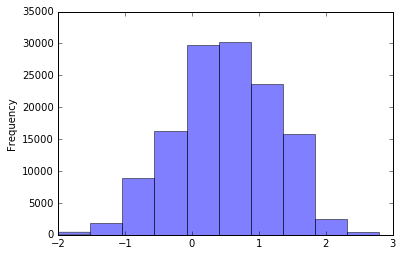

In [13]:
df_dly[df_dly['Data1'] > 8000]['Dly'].plot(kind='hist', alpha=0.5)

In [112]:
df_dly[df_dly['Data1'] >= 8000].Dly.describe()

count    132370.000000
mean          0.534377
std           0.745887
min          -2.000000
25%           0.000000
50%           0.598214
75%           1.000000
max           3.000000
Name: Dly, dtype: float64

In [113]:
df_dly[df_dly.index == [df_dly[(df_dly.Data1 >= 8000)].Dly.argmax()]]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
9127,RC01927M,25C,9,3.0,Delay,8.04,8000,0.5
9127,RC01927M,105C,10,3.0,Delay,8.08,8000,1.0
9127,RC01927M,-5C,11,3.0,Delay,8.08,8000,1.0
9127,RC01928M,25C,9,3.0,Delay,8.20,8000,2.5
9127,RC01928M,105C,9,3.0,Delay,8.24,8000,3.0
9127,RC01928M,-5C,9,3.0,Delay,8.20,8000,2.5
9127,RC01929M,25C,9,3.0,Delay,8.16,8000,2.0
9127,RC01929M,105C,9,3.0,Delay,8.20,8000,2.5
9127,RC01929M,-5C,9,3.0,Delay,8.16,8000,2.0


In [114]:
df_dly[df_dly.index == [df_dly[(df_dly.Data1 < 8000)].Dly.argmax()]]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
8728,RC01927M,25C,9,2.9,Delay,2.01,2000,0.5
8728,RC01927M,105C,10,2.9,Delay,2.02,2000,1.0
8728,RC01927M,-5C,11,2.9,Delay,2.01,2000,0.5
8728,RC01928M,25C,9,2.9,Delay,2.08,2000,4.0
8728,RC01928M,105C,9,2.9,Delay,2.10,2000,5.0
8728,RC01928M,-5C,9,2.9,Delay,2.08,2000,4.0
8728,RC01929M,25C,9,2.9,Delay,2.07,2000,3.5
8728,RC01929M,105C,9,2.9,Delay,2.09,2000,4.5
8728,RC01929M,-5C,9,2.9,Delay,2.06,2000,3.0


In [17]:
df_dly[(df_dly.Temp == '25C') & (df_dly['Dev#'] == 16) & (df_dly.Lot == 'RC01929M')]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
16350,RC01929M,25C,16,3.7,Delay,2.0500,2000,2.50000
16351,RC01929M,25C,16,3.6,Delay,2.0500,2000,2.50000
16352,RC01929M,25C,16,3.5,Delay,2.0500,2000,2.50000
16353,RC01929M,25C,16,3.4,Delay,2.0400,2000,2.00000
16354,RC01929M,25C,16,3.3,Delay,2.0500,2000,2.50000
16355,RC01929M,25C,16,3.2,Delay,2.0500,2000,2.50000
16356,RC01929M,25C,16,3.1,Delay,2.0700,2000,3.50000
16357,RC01929M,25C,16,3.0,Delay,2.0600,2000,3.00000
16358,RC01929M,25C,16,2.9,Delay,2.0600,2000,3.00000
16359,RC01929M,25C,16,2.8,Delay,2.0700,2000,3.50000
